In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [76]:
df = pd.read_csv('./datas/titanic.csv')

In [77]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [78]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
df.Age.median()

28.0

In [80]:
df.fillna(df.Age.mean(), inplace=True)

In [81]:
df.drop(['PassengerId','Name', 'Cabin','Ticket', 'Embarked'], axis = 1,inplace = True)

In [82]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [83]:
categorical_data = data_train.select_dtypes(include=['object']).columns
categorical_data

Index(['Sex'], dtype='object')

In [84]:
le = LabelEncoder()

In [85]:
for cat_data in categorical_data:
    df[cat_data+"_le"] = le.fit_transform(df[cat_data])
    df.drop([cat_data], axis = 1, inplace = True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_le
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [87]:
data_train, data_test, target_train, target_test = train_test_split(df[['Pclass','Sex_le','Age','SibSp','Parch','Fare']],df.Survived, test_size = 0.2)
len(data_train)

712

(array([21.,  9., 32., 39., 77., 32., 18., 15.,  7.,  7.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <BarContainer object of 10 artists>)

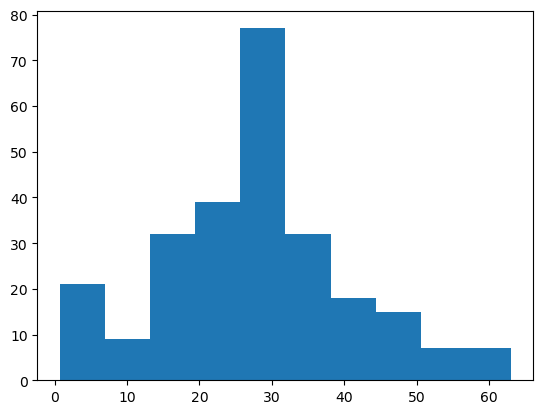

In [88]:
plt.hist(data_train[data_train['Sex_le'] == 0]['Age'])

(array([ 22.,  16.,  90., 190.,  54.,  36.,  24.,  14.,   7.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

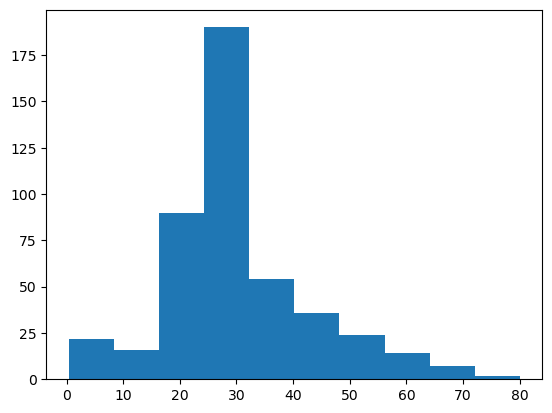

In [90]:
plt.hist(data_train[data_train['Sex_le'] == 1]['Age'])

In [94]:
model = DecisionTreeClassifier()

In [95]:
model.fit(data_train, target_train)

DecisionTreeClassifier()

In [100]:
model.score(data_test, target_test)

0.776536312849162

In [101]:
model.predict(data_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0])

In [102]:
predicted = model.predict(data_test)
cm = confusion_matrix(target_test, predicted)
cm

array([[92, 20],
       [20, 47]])

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
model = RandomForestClassifier()

In [105]:
model.fit(data_train, target_train)

RandomForestClassifier()

In [106]:
model.score(data_test, target_test)

0.7932960893854749

In [107]:
predicted = model.predict(data_test)
cm = confusion_matrix(target_test, predicted)
cm

array([[94, 18],
       [19, 48]])